<h1>TP Data visualisation </h1>

Digimon, abréviation de "monstres numériques", est une franchise qui s'articule autour d'une mécanique de base qui consiste à capturer, soigner et entraîner les monstres pour ensuite s'engager dans le combat avec eux. C'est similaire aux Pokémon. <br>

Ce fichier contient une liste de tous les Digimon du jeu, avec leur niveau, leur coquille, leur attribut, leur mémoire et le nombre de slots d'équipement. Toutes les statistiques (HP, SP, attaque, défense, intelligence et vitesse) sont pour ce Digimon au niveau 50.<br><br>

pour toute la suite de cet exercice vous pouvez prendre pour modèle ce que nous avons fait pendant le cours (si vous êtes perdus). Et pour chaque questions n'hesitez pas à écrire vos observations/analyses ! <br><br>

1) importez le fichier DigiDB_digimonlist.csv et affichez le header<br>
2) A l'aide de la fonction .info() de pandas, vérifiez le type des colonnes et si des valeurs manquent dans certaines d'entre elle<br>
3) à l'aide de matplotlib, affichez un bar chart du nombre de digimons par niveau (Stage). <br>
4) faites le même exercice avec les attributs. Il y a plus de valeurs...adaptez la largeur du graphique pour que cela reste simple à consulter<br>
5) en utilisant sns.distplot, affichez la répartition de la colonne Memory<br>
6) en utiliant sns.kdeplot, affichez uniquement la courbe de répartition de la colonne 'Lv 50 HP'<br>
7) en utilisant scatter_matrix de Pandas, affichez la répartition et les nuages de point des 6 dernières colonnes du data set<br>
8) Il semble y avoir quelque chose d'intéréssant entre 'Lv50 SP' et 'Lv50 Int'...utilisez sns.jointplot pour voir cela plus en détail<br>
9) en utilisant sns.lmplot, ajoutez le niveau des digimons (Stage) sur le nuage de points réalisé en point 8.<br>
10) En utilisant sns.violinplot, visionnez la réparition de 'Lv 50 HP' en fonction du stage du digimon.<br>



1) importez le fichier DigiDB_digimonlist.csv et affichez le header

In [10]:
import pandas as pd
data = pd.read_csv('/content/DigiDB_digimonlist.csv',encoding='latin-1', sep=',')
data.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


2) A l'aide de la fonction .info() de pandas, vérifiez le type des colonnes et si des valeurs manquent dans certaines d'entre elle

In [11]:
data.shape

(249, 13)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Number       249 non-null    int64 
 1   Digimon      249 non-null    object
 2   Stage        249 non-null    object
 3   Type         249 non-null    object
 4   Attribute    249 non-null    object
 5   Memory       249 non-null    int64 
 6   Equip Slots  249 non-null    int64 
 7   Lv 50 HP     249 non-null    int64 
 8   Lv50 SP      249 non-null    int64 
 9   Lv50 Atk     249 non-null    int64 
 10  Lv50 Def     249 non-null    int64 
 11  Lv50 Int     249 non-null    int64 
 12  Lv50 Spd     249 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 25.4+ KB


In [13]:
data.isnull().sum()/len(data)

Number         0.0
Digimon        0.0
Stage          0.0
Type           0.0
Attribute      0.0
Memory         0.0
Equip Slots    0.0
Lv 50 HP       0.0
Lv50 SP        0.0
Lv50 Atk       0.0
Lv50 Def       0.0
Lv50 Int       0.0
Lv50 Spd       0.0
dtype: float64

3) à l'aide de matplotlib, affichez un bar chart du nombre de digimons par niveau (Stage).

In [14]:
stages = data['Stage'].value_counts()
stages

Mega           74
Ultimate       58
Champion       54
Rookie         38
In-Training    11
Ultra           6
Baby            5
Armor           3
Name: Stage, dtype: int64

[Text(0, 0, 'Mega'),
 Text(0, 0, 'Ultimate'),
 Text(0, 0, 'Champion'),
 Text(0, 0, 'Rookie'),
 Text(0, 0, 'In-Training'),
 Text(0, 0, 'Ultra'),
 Text(0, 0, 'Baby'),
 Text(0, 0, 'Armor')]

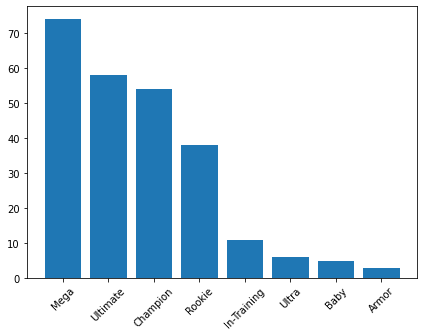

In [15]:
stages = data['Stage'].value_counts()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ax1.bar(range(len(stages)),stages)
tick_positions = range(0,len(stages))
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(stages.index, rotation=45)

4) faites le même exercice avec les attributs. Il y a plus de valeurs...adaptez la largeur du graphique pour que cela reste simple à consulter

[Text(0, 0, 'Dark'),
 Text(0, 0, 'Fire'),
 Text(0, 0, 'Light'),
 Text(0, 0, 'Neutral'),
 Text(0, 0, 'Plant'),
 Text(0, 0, 'Electric'),
 Text(0, 0, 'Earth'),
 Text(0, 0, 'Water'),
 Text(0, 0, 'Wind')]

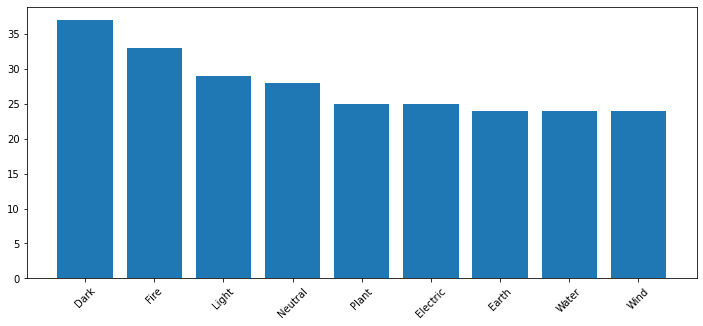

In [16]:
Type = data['Attribute'].value_counts()

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(111)
ax1.bar(range(len(Type)),Type)
tick_positions = range(0,len(Type))
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(Type.index, rotation=45)

5) en utilisant sns.distplot, affichez la répartition de la colonne Memory

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


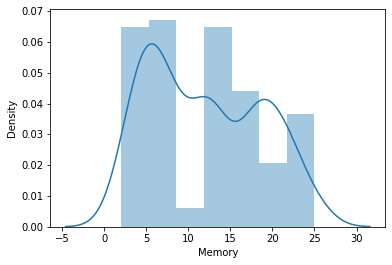

In [17]:
import seaborn as sns
sns.distplot(data['Memory'])
sns.set()
plt.show()

6) en utiliant sns.kdeplot, affichez uniquement la courbe de répartition de la colonne 'Lv 50 HP'

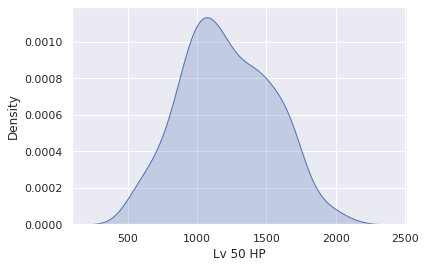

In [18]:
sns.kdeplot(data['Lv 50 HP'], shade = True)
sns.set()
plt.show()

7) en utilisant scatter_matrix de Pandas, affichez la répartition et les nuages de point des 6 dernières colonnes du data set

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c66541950>,
      dtype=object)

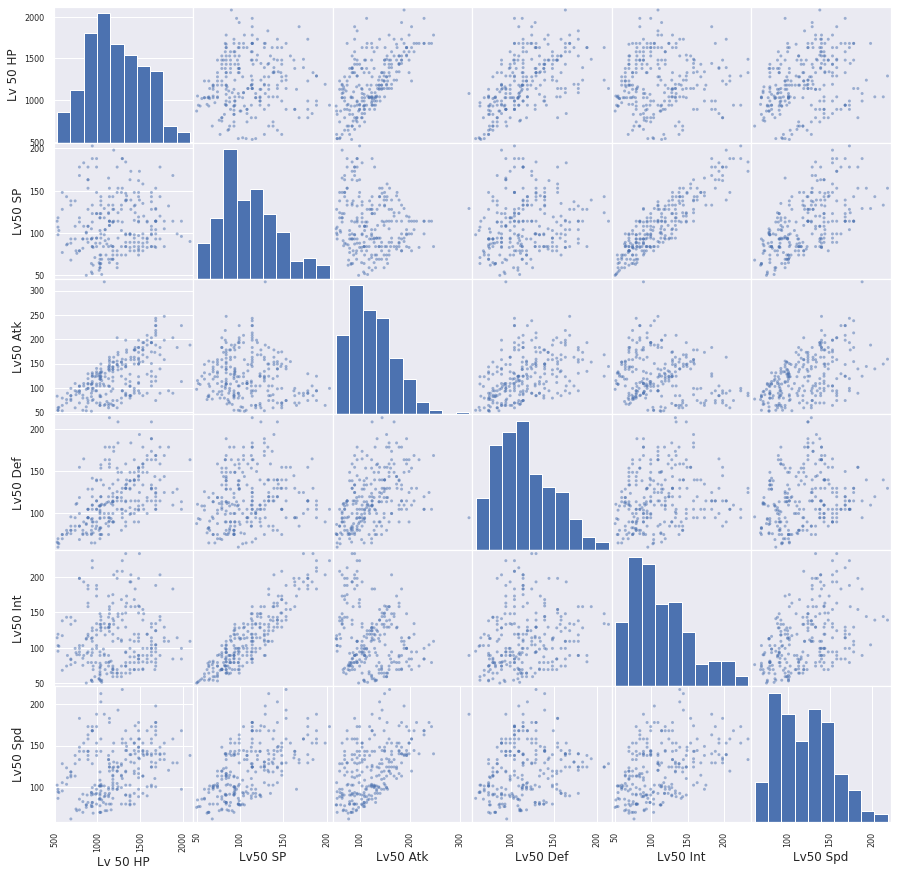

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[data.columns[-6:]], figsize=(15,15))

8) Il semble y avoir quelque chose d'intéréssant entre 'Lv50 SP' et 'Lv50 Int'...utilisez sns.jointplot pour voir cela plus en détail

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


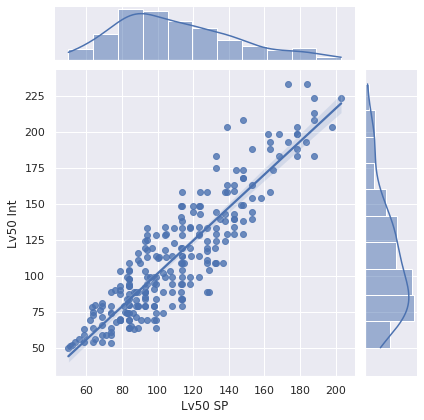

In [32]:
sns.jointplot("Lv50 SP", "Lv50 Int", data=data, kind="reg")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


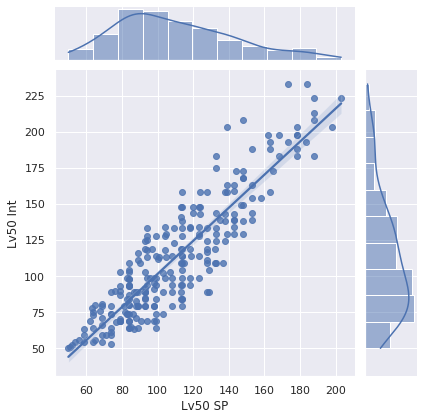

In [30]:
sns.jointplot(data["Lv50 SP"], data["Lv50 Int"], kind="reg")
plt.show()

9) en utilisant sns.lmplot, ajoutez le niveau des digimons (Stage) sur le nuage de points réalisé en point 8.

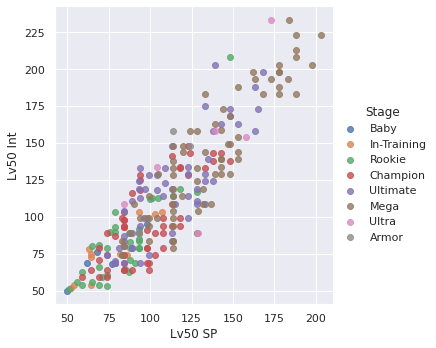

In [26]:
sns.lmplot(x="Lv50 SP", y= "Lv50 Int", hue="Stage", data=data, fit_reg = False)
plt.show()

10) En utilisant sns.violinplot, visionnez la réparition de 'Lv 50 HP' en fonction du stage du digimon.

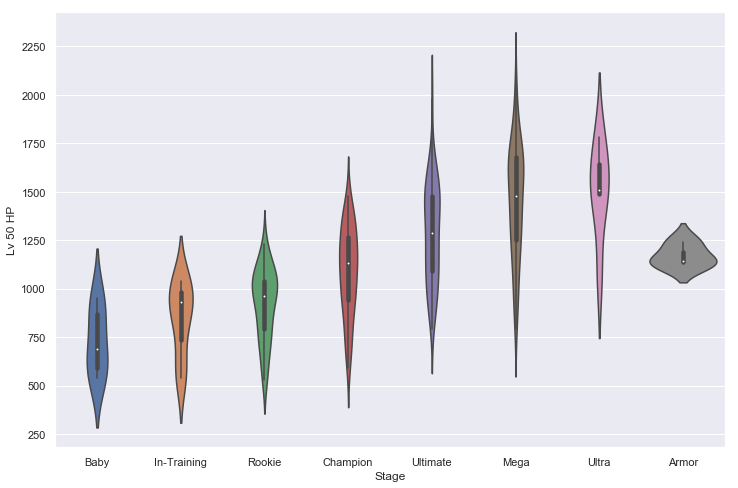

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.violinplot(x="Stage", y="Lv 50 HP", data=data)
plt.show()